In [761]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [762]:
ds = pd.read_csv('train.csv')
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [763]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [764]:
def bar_chart(feature):
    Survived = ds[ds.Survived == 1][feature].value_counts()
    Dead = ds[ds.Survived == 0][feature].value_counts()
    df = pd.DataFrame([Survived,Dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))
    

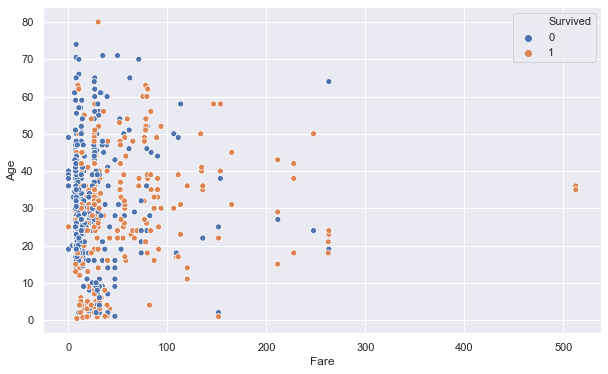

In [765]:
plt.figure(figsize = (10,6))
sb.scatterplot(ds['Fare'], ds['Age'],
               hue = ds.Survived)

### Visual Analysis of Catogorical Features

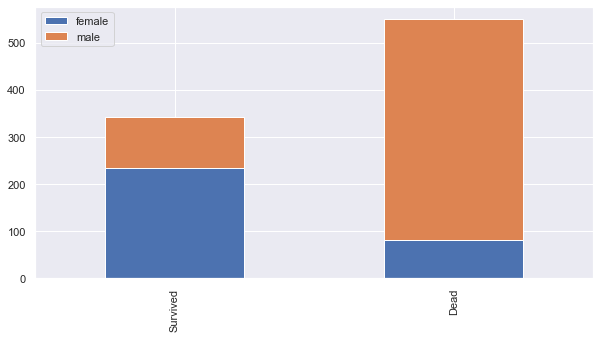

In [766]:
bar_chart('Sex')

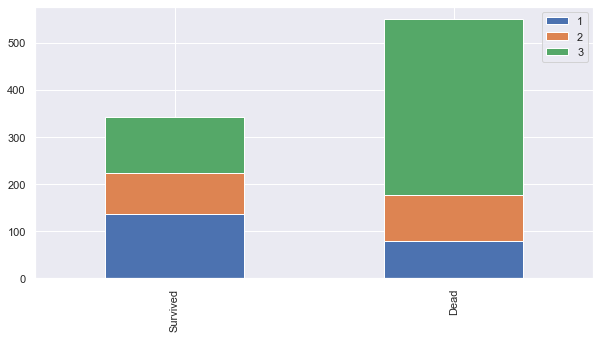

In [767]:
bar_chart('Pclass')

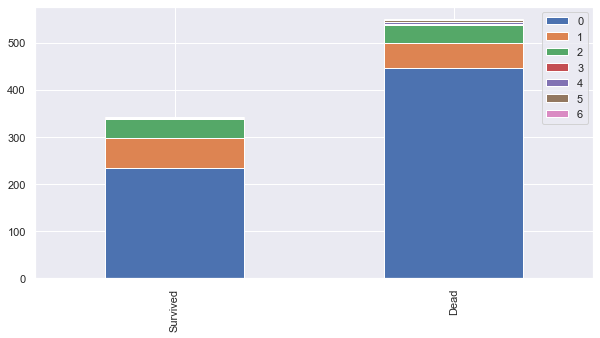

In [768]:
bar_chart('Parch')

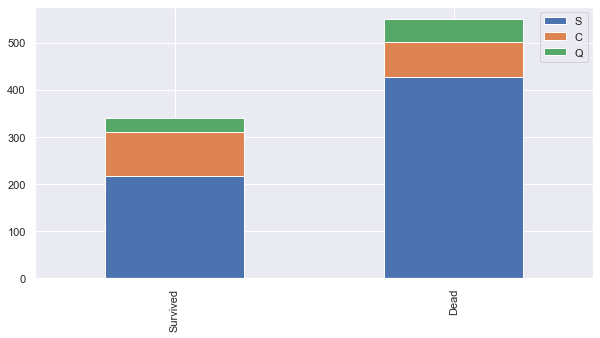

In [769]:
bar_chart('Embarked')

### Feature Enineering 

In [770]:
# Extrating information from Name features

#### Name/Title 

In [771]:
ds['Title'] = ds['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [772]:
ds.groupby('Title').Survived.agg(['count','sum']).sort_values(by = 'sum',
                                            ascending = False).rename(columns = dict(count = 'Total',
                                                                                    sum = 'Survived'))

,Total,Survived
Title,,
Miss,182,127
Mrs,125,99
Mr,517,81
Master,40,23
Dr,7,3
Mlle,2,2
Ms,1,1
Mme,1,1
Sir,1,1


In [773]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


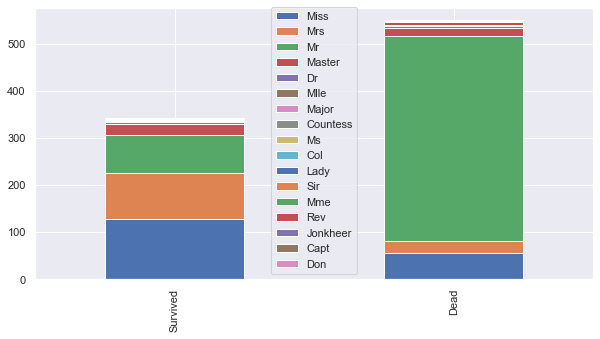

In [774]:
bar_chart('Title')

In [775]:
# Title mapping into a smaller groups.
Title_Dictionary = dict(Capt = 'others',
 Col = 'others',
 Major = 'others',
 Jonkheer = 'others',
 Don = 'others',
 Sir = 'others',
 Dr = 'others',
 Rev  = 'others',
 Countess = 'others',
 Mme = 'Mrs',
 Mlle = 'Miss',
 Ms = 'Mrs',
 Mr = 'Mr',
 Mrs = 'Mrs',
 Miss =  'Miss',
 Master = 'Master',
 Lady = 'others')


ds['Title'] = ds['Title'].map(Title_Dictionary)

In [776]:
ds.Title.value_counts()

Mr        517
Miss      184
Mrs       127
Master     40
others     23
Name: Title, dtype: int64

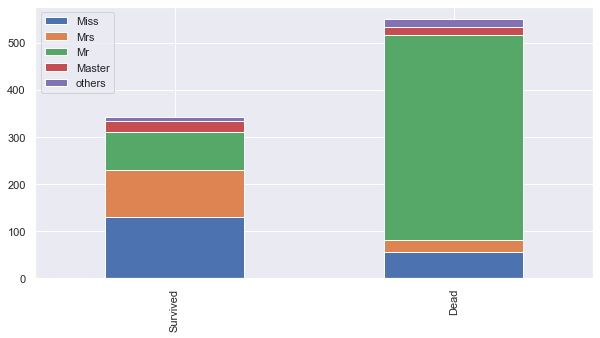

In [777]:
bar_chart('Title')

In [778]:
title_info = ds.groupby('Title').Survived.agg(['count','sum']).sort_values(by = 'sum',
                                            ascending = False).rename(columns = dict(count = 'Total',
                                                                                    sum = 'Survived'))
pd.concat([title_info,((round(title_info.Survived/title_info.Total,3)*100)).rename('Survival probability %')],
           1)

,Total,Survived,Survival probability %
Title,,,
Miss,184,129,70.1
Mrs,127,101,79.5
Mr,517,81,15.7
Master,40,23,57.5
others,23,8,34.8


In [779]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [780]:
ds.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### AGE

In [781]:
grouped_age_info = ds.groupby(['Sex','Pclass','Title'])[['Age']].agg(['median',
                                        'count']).reset_index()[['Sex','Pclass', 'Title', 'Age']]

In [782]:
grouped_age_info.head()

Sex Pclass   Title    Age      
                         median count
0  female      1    Miss   30.0    47
1  female      1     Mrs   40.0    35
2  female      1  others   48.0     3
3  female      2    Miss   24.0    32
4  female      2     Mrs   31.5    42

In [783]:
# Replacing missing 'Age' with median of grouped ['Sex','Pclass','Title'] features.
ds['Age'] = ds.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))

In [784]:
ds.Age.isnull().sum()

0

Text(0.5, 1.0, 'unscaled  data')

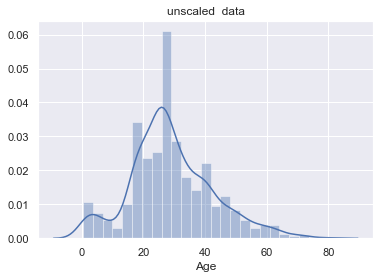

In [785]:
sb.distplot(ds['Age'])
plt.title('unscaled  data')

In [786]:
ds['Age'] = StandardScaler().fit_transform(ds.Age.values.reshape(-1,1))

Text(0.5, 1.0, 'scaled data')

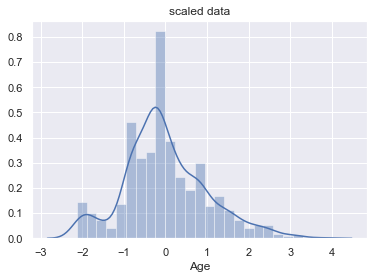

In [787]:
sb.distplot(ds['Age'])
plt.title('scaled data')

####  Sex 

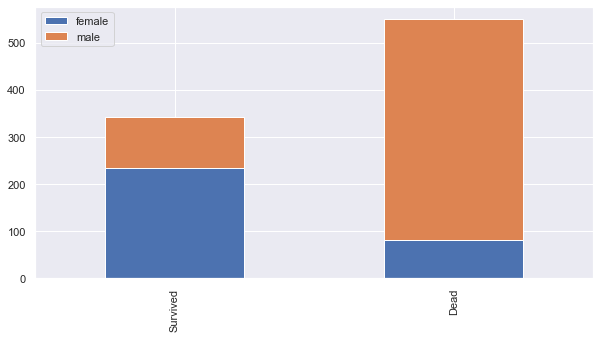

In [788]:
bar_chart('Sex')

#### Embarked 

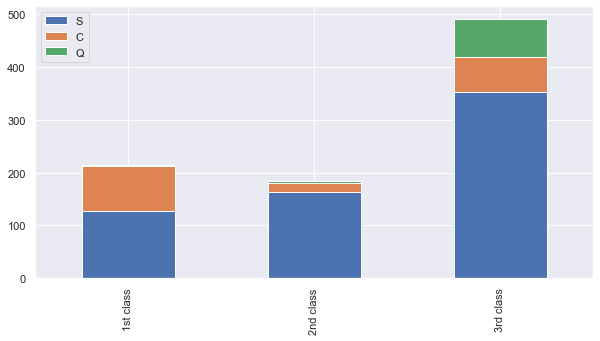

In [789]:
# analysing feature 'Embarked' in terms of feature 'Pclass'
Pclass1 = ds[ds['Pclass']==1]['Embarked'].value_counts()
Pclass2 = ds[ds['Pclass']==2]['Embarked'].value_counts()
Pclass3 = ds[ds['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [790]:
# filling out missing embarked with 'S'
ds['Embarked'] = ds['Embarked'].fillna('S')

In [791]:
ds.Embarked.isnull().sum()

0

In [792]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

####  Fare

Text(0.5, 1.0, 'unscaled  data')

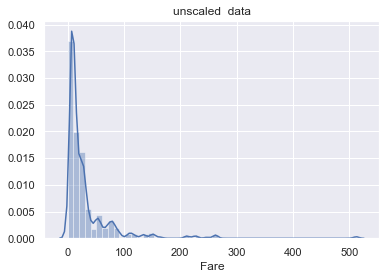

In [793]:
sb.distplot(ds['Fare'])
plt.title('unscaled  data')

In [794]:
ds['Fare'] = np.log1p(ds['Fare'])

In [795]:
ds['Fare'] = StandardScaler().fit_transform(ds.Fare.values.reshape(-1,1))

Text(0.5, 1.0, 'transformed and scaled data')

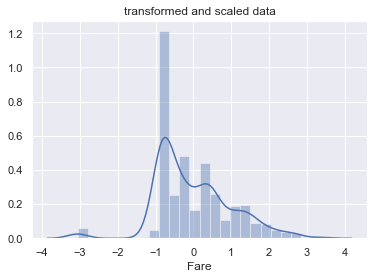

In [796]:
sb.distplot(ds['Fare'])
plt.title('transformed and scaled data')

####  Cabin

In [797]:
# extracting 1st letter from  'Cabin' feature and replacing missing value with 'U'
ds['Cabin'] = ds['Cabin'].str[:1]
ds.fillna('NAN', inplace = True)

In [798]:
ds['Cabin']

0      NAN
1        C
2      NAN
3        C
4      NAN
      ... 
886    NAN
887      B
888    NAN
889      C
890    NAN
Name: Cabin, Length: 891, dtype: object

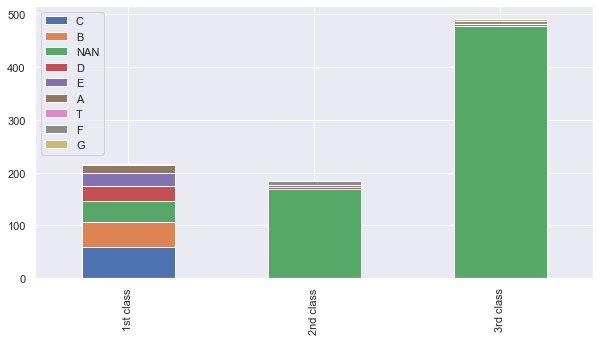

In [799]:
Pclass1 = ds[ds['Pclass']==1]['Cabin'].value_counts()
Pclass2 = ds[ds['Pclass']==2]['Cabin'].value_counts()
Pclass3 = ds[ds['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

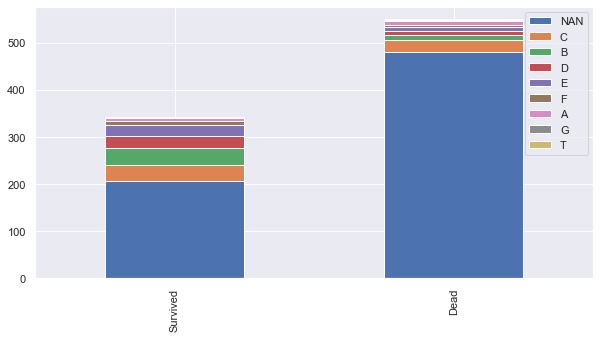

In [800]:
bar_chart('Cabin')

In [801]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.529214,1,0,A/5 21171,-0.879741,NAN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.657366,1,0,PC 17599,1.361220,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.232569,0,0,STON/O2. 3101282,-0.798540,NAN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434882,1,0,113803,1.062038,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0.434882,0,0,373450,-0.784179,NAN,S,Mr


#### Creating new feature 'FamilySize' with help of SibSp & Parch

In [802]:
ds["FamilySize"] = ds["SibSp"] + ds["Parch"] + 1

In [803]:
ds.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

(0, 11.0)

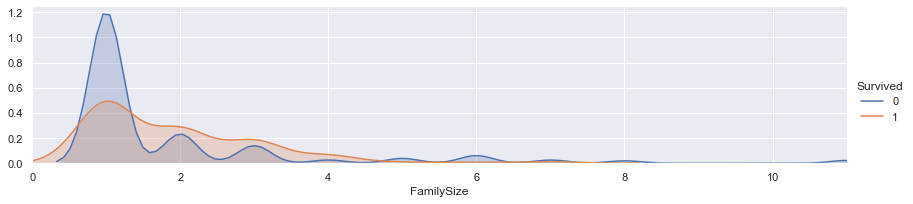

In [804]:
facet = sb.FacetGrid(ds, hue="Survived",aspect=4)
facet.map(sb.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, ds['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [805]:
# 'FamilySize' feature binning
ds['FamilySize'] = ds.loc[:,'FamilySize'].map(lambda s: 'single' if s == 1 
                                            else( 'smallfamily' if 2 <= s <= 4 else 'largefamily'))

In [806]:
ds.FamilySize.value_counts()

single         537
smallfamily    292
largefamily     62
Name: FamilySize, dtype: int64

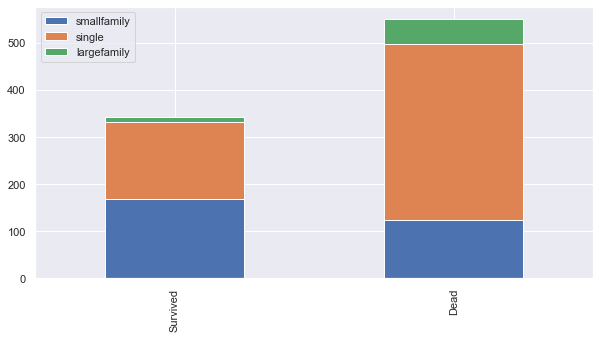

In [807]:
bar_chart('FamilySize')

In [808]:
familysize_info = ds.groupby('FamilySize').Survived.agg(['count','sum']).sort_values(by = 'sum',
                                            ascending = False).rename(columns = dict(count = 'Total',
                                                                                    sum = 'Survived'))
pd.concat([familysize_info,((round(familysize_info.Survived/familysize_info.Total,3)*100)).rename('Survival probability %')],
           1)

,Total,Survived,Survival probability %
FamilySize,,,
smallfamily,292,169,57.9
single,537,163,30.4
largefamily,62,10,16.1


In [809]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.529214,1,0,A/5 21171,-0.879741,NAN,S,Mr,smallfamily
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.657366,1,0,PC 17599,1.361220,C,C,Mrs,smallfamily
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.232569,0,0,STON/O2. 3101282,-0.798540,NAN,S,Miss,single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434882,1,0,113803,1.062038,C,S,Mrs,smallfamily
4,5,0,3,"Allen, Mr. William Henry",male,0.434882,0,0,373450,-0.784179,NAN,S,Mr,single


In [810]:
# dropping un-necessary features

features_drop = ['PassengerId','Ticket','SibSp', 'Parch','Name']
ds = ds.drop(features_drop, axis=1)

In [811]:
ds

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,-0.529214,-0.879741,NAN,S,Mr,smallfamily
1,1,1,female,0.657366,1.361220,C,C,Mrs,smallfamily
2,1,3,female,-0.232569,-0.798540,NAN,S,Miss,single
3,1,1,female,0.434882,1.062038,C,S,Mrs,smallfamily
4,0,3,male,0.434882,-0.784179,NAN,S,Mr,single
...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.158408,-0.333698,NAN,S,others,single
887,1,1,female,-0.751698,0.487082,B,S,Miss,single
888,0,3,female,-0.825859,0.242007,NAN,S,Miss,smallfamily
889,1,1,male,-0.232569,0.487082,C,C,Mr,single


In [812]:
x = ds.drop('Survived', 1)
y = ds.Survived

In [813]:
encoder = OneHotEncoder(sparse = False)

In [814]:
x_en = encoder.fit_transform(x.drop(['Age','Fare','Pclass'], 1))

In [815]:
encoder.get_feature_names(x.drop(['Age','Fare','Pclass'], 1).columns)

array(['Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_NAN', 'Cabin_T',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_others',
       'FamilySize_largefamily', 'FamilySize_single',
       'FamilySize_smallfamily'], dtype=object)

In [816]:
x_en = pd.DataFrame(x_en, columns = encoder.get_feature_names(x.drop(['Age','Fare','Pclass'], 1).columns))

In [817]:
x_en = pd.concat([x[['Age','Fare','Pclass']], x_en], 1)

In [818]:
x_en

,Age,Fare,Pclass,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_others,FamilySize_largefamily,FamilySize_single,FamilySize_smallfamily
0,-0.529214,-0.879741,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.657366,1.361220,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.232569,-0.798540,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.434882,1.062038,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.434882,-0.784179,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.158408,-0.333698,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
887,-0.751698,0.487082,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
888,-0.825859,0.242007,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
889,-0.232569,0.487082,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [819]:
x_train, x_test, y_train, y_test = train_test_split(x_en , y,
                                                   test_size = 0.3, random_state = 42)

In [820]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((623, 25), (268, 25), (623,), (268,))

Applaying PCA to AGE and FARE and binning the resultant principle component

In [821]:
pca =  PCA(n_components = 1)
pca.fit(x_train[['Age','Fare']])

PCA(n_components=1)

In [822]:
x_train['pca_age_fare'] = pca.transform(x_train.loc[:,['Age','Fare']])
x_test['pca_age_fare'] = pca.transform(x_test.loc[:,['Age','Fare']])

In [823]:
ds_train = pd.concat([x_train,y_train],1)

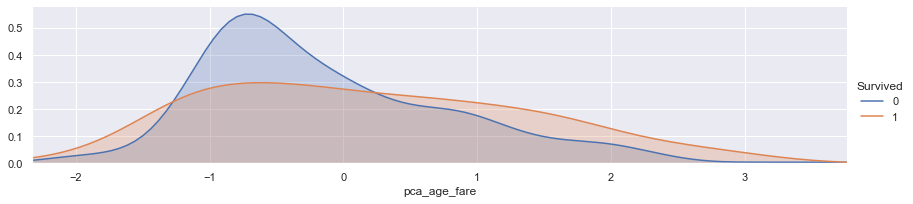

In [824]:
facet = sb.FacetGrid(ds_train, hue = 'Survived',aspect=4)
facet.map(sb.kdeplot,'pca_age_fare',shade= True)
facet.set(xlim=(ds_train.pca_age_fare.min(), ds_train.pca_age_fare.max()))
facet.add_legend()


In [825]:
# 'pca_age_fare' feature binning and onehotencoding for train set.
x_train['pca_cat_1'] = x_train.loc[:,'pca_age_fare'].map(lambda s:  1 if s <= -1.275  else 0)
x_train['pca_cat_2'] = x_train.loc[:,'pca_age_fare'].map(lambda s:  1 if -1.275 < s < 0.2 else 0)
x_train['pca_cat_3'] = x_train.loc[:,'pca_age_fare'].map(lambda s:  1 if s >0.2 else 0)


# doing same for x_test using x_train analysis
x_test['pca_cat_1'] = x_test.loc[:,'pca_age_fare'].map(lambda s:  1 if s <= -1.275  else 0)
x_test['pca_cat_2'] = x_test.loc[:,'pca_age_fare'].map(lambda s:  1 if -1.275 < s < 0.2 else 0)
x_test['pca_cat_3'] = x_test.loc[:,'pca_age_fare'].map(lambda s:  1 if s >0.2 else 0)

In [826]:
x_train.drop(['Age','Fare','pca_age_fare'], 1, inplace = True)
x_test.drop(['Age','Fare','pca_age_fare'], 1, inplace = True)

In [827]:
x_train

,Pclass,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Title_Miss,Title_Mr,Title_Mrs,Title_others,FamilySize_largefamily,FamilySize_single,FamilySize_smallfamily,pca_cat_1,pca_cat_2,pca_cat_3
445,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0
650,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0
172,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
450,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1
314,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0
270,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1
860,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1
435,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1


In [828]:
x_train.shape, x_test.shape

((623, 26), (268, 26))

In [829]:
selector = SelectKBest(chi2).fit(x_train, y_train)

In [830]:
selector = pd.DataFrame(dict(Feature = list(x_train.columns), Scores = selector.scores_))

selector.sort_values(by = 'Scores', ascending = False ).head(30)

,Feature,Scores
1,Sex_female,116.300724
17,Title_Mr,73.521082
18,Title_Mrs,69.305298
2,Sex_male,60.419644
16,Title_Miss,48.504772
22,FamilySize_smallfamily,28.606441
4,Cabin_B,19.724026
12,Embarked_C,17.535144
0,Pclass,17.408072
7,Cabin_E,16.719579


In [831]:
# keeping features with scores above threshold score.
threshold = 3.325462
selected_features = selector[selector.Scores > threshold]
selected_features.sort_values(by = 'Scores', ascending = False )

,Feature,Scores
1,Sex_female,116.300724
17,Title_Mr,73.521082
18,Title_Mrs,69.305298
2,Sex_male,60.419644
16,Title_Miss,48.504772
22,FamilySize_smallfamily,28.606441
4,Cabin_B,19.724026
12,Embarked_C,17.535144
0,Pclass,17.408072
7,Cabin_E,16.719579


In [832]:
print('no. of selected features:', len(selected_features))

no. of selected features: 21


In [833]:
# selecting highest scoring features for train and test set.
x_train_red = x_train[list(selected_features['Feature'])]
x_test_red = x_test[list(selected_features['Feature'])]

In [834]:
x_train_red.shape, x_test_red.shape

((623, 21), (268, 21))

In [835]:
k = KFold(n_splits = 10, shuffle = True, random_state = 42)

###  Base Model Evaluation

model: RandomForestClassifier(random_state=42)
CV score:0.8409626216077829
score_std: 0.03674701197265946
----------
model: LogisticRegression()
CV score:0.8282386072708652
score_std: 0.035991651720992585
----------
model: SVC()
CV score:0.8315668202764976
score_std: 0.04025640096137338
----------
model: AdaBoostClassifier()
CV score:0.8218125960061442
score_std: 0.03330083369053835
----------
model: GradientBoostingClassifier(random_state=42)
CV score:0.8425755248335893
score_std: 0.030079571979289815
----------
model: KNeighborsClassifier()
CV score:0.8394265232974909
score_std: 0.034045135507626736
----------
model: XGBClassifier()
CV score:0.8377112135176651
score_std: 0.033264095708674855
----------
model: GaussianNB()
CV score:0.7977982590885816
score_std: 0.025777125137250192
----------


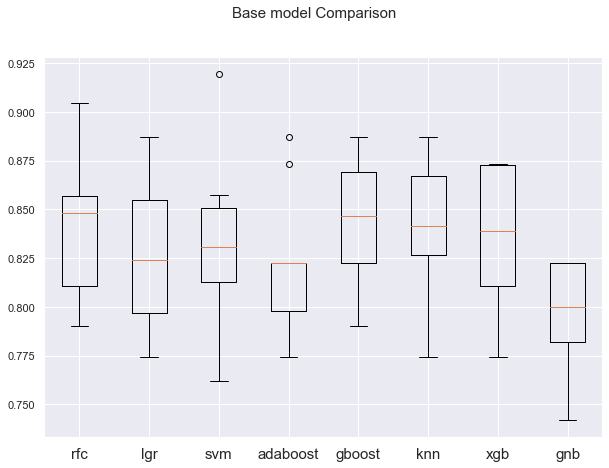

In [836]:
rfc = RandomForestClassifier(random_state = 42)
lgr = LogisticRegression()
svm = SVC()
adaboost =  AdaBoostClassifier()
gboost = GradientBoostingClassifier(random_state = 42)
knn = KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
gnb = GaussianNB()
models = [rfc, lgr, svm, adaboost, gboost, knn, xgb, gnb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train_red, y_train, cv = k, scoring = 'accuracy', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfc', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb', 'gnb'],
                  fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

### Hyper-parameter tuning

In [837]:
param_svm = dict(kernel = ['rbf','poly','sigmoid','linear'], gamma = np.arange(0.25,3,0.25), degree = [2,3,4,5],
             C =np.logspace(4,-4,60))

param_rfc = dict(n_estimators = [10,15,20,25,30], criterion = ['gini', 'entropy'],
                max_depth = [3,4,5,6,7,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [41,42,43])

param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ])

param_knn = dict(n_neighbors = np.arange(1,101,1), algorithm = ['auto','ball_tree','kd_tree','brute'],
                leaf_size = [25,30,35], p = [1,2], weights = ['uniform','distance'])

param_gboost =  dict(
   learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
   max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
   n_estimators = [100, 150, 200],
   min_samples_split = [1,2,3],
   min_samples_leaf = [1,2])


In [838]:
model_param_list = [(gboost, param_gboost), (svm,param_svm), (xgb,param_xgb), (knn,param_knn),
                   (rfc, param_rfc)]

In [839]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_rearch =RandomizedSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'accuracy', 
                                 random_state = 42 )
    r_rearch.fit(x_train_red, y_train.values.ravel())
    best_cvscore = r_rearch.best_score_
    best_param = r_rearch.best_params_
    best_estimator = r_rearch.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',best_estimator_list)

model: GradientBoostingClassifier(random_state=42)
best_cvscore: 0.8458013312852021
best_param: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.15}


model: SVC()
best_cvscore: 0.8490015360983103
best_param: {'kernel': 'poly', 'gamma': 1.25, 'degree': 4, 'C': 0.17957144943716408}


model: XGBClassifier()
best_cvscore: 0.8474142345110087
best_param: {'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}


model: KNeighborsClassifier()
best_cvscore: 0.8360983102918587
best_param: {'weights': 'distance', 'p': 1, 'n_neighbors': 22, 'leaf_size': 30, 'algorithm': 'ball_tree'}


model: RandomForestClassifier(random_state=42)
best_cvscore: 0.8363031233998977
best_param: {'random_state': 42, 'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy'}


best_estimators: [GradientBoostingClassifier(learning_rate=0.15, max_depth=4, random_state=42), 

Now we shall test the tuned model with both train and test data for final selection of model.

In [840]:
for model in best_estimator_list:
    model.fit(x_train_red, y_train)
    y_pred = model.predict(x_train_red)
    score = accuracy_score(y_train, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')


model GradientBoostingClassifier(learning_rate=0.15, max_depth=4, random_state=42)
accuracy %: 87.96147672552166


model SVC(C=0.17957144943716408, degree=4, gamma=1.25, kernel='poly')
accuracy %: 87.96147672552166


model XGBClassifier(colsample_bytree=0.5, gamma=0.1, max_depth=12, min_child_weight=3)
accuracy %: 86.19582664526484


model KNeighborsClassifier(algorithm='ball_tree', n_neighbors=22, p=1,
                     weights='distance')
accuracy %: 87.96147672552166


model RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       n_estimators=10, random_state=42)
accuracy %: 83.62760834670947




In [841]:
for model in best_estimator_list:
    model.fit(x_train_red, y_train)
    y_pred = model.predict(x_test_red)
    score = accuracy_score(y_test, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')


model GradientBoostingClassifier(learning_rate=0.15, max_depth=4, random_state=42)
accuracy %: 80.22388059701493


model SVC(C=0.17957144943716408, degree=4, gamma=1.25, kernel='poly')
accuracy %: 80.59701492537313


model XGBClassifier(colsample_bytree=0.5, gamma=0.1, max_depth=12, min_child_weight=3)
accuracy %: 81.34328358208955


model KNeighborsClassifier(algorithm='ball_tree', n_neighbors=22, p=1,
                     weights='distance')
accuracy %: 80.59701492537313


model RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       n_estimators=10, random_state=42)
accuracy %: 82.08955223880598


